In [39]:
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Variables ####
stock = 'AAPL'
params = {
    'range' : '1y',
    'interval' : '1d',
    'events' : 'history'
}

In [40]:
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}

stock_url = f'https://query1.finance.yahoo.com/v7/finance/download/{stock}?'

responce = requests.get(stock_url, params=params, headers=headers)

file = StringIO(responce.text)
reader = csv.reader(file)
data = list(reader)
# data

In [41]:
df = pd.DataFrame(columns=data[0], data=data[1:])

df['Date'] = pd.to_datetime(df['Date'])
df['#'] = df.index
df = df.set_index('Date')

# df['Open'] = pd.to_numeric(df['Open'])
cols = df.columns
for col in cols:
    df[col] = pd.to_numeric(df[col])

df.head()

,Open,High,Low,Close,Adj Close,Volume,#
Date,,,,,,,
2020-09-09,117.260002,119.139999,115.260002,117.320000,116.570236,176940500,0
2020-09-10,120.360001,120.500000,112.500000,113.489998,112.764717,182274400,1
2020-09-11,114.570000,115.230003,110.000000,112.000000,111.284241,180860300,2
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100,3
2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000,4


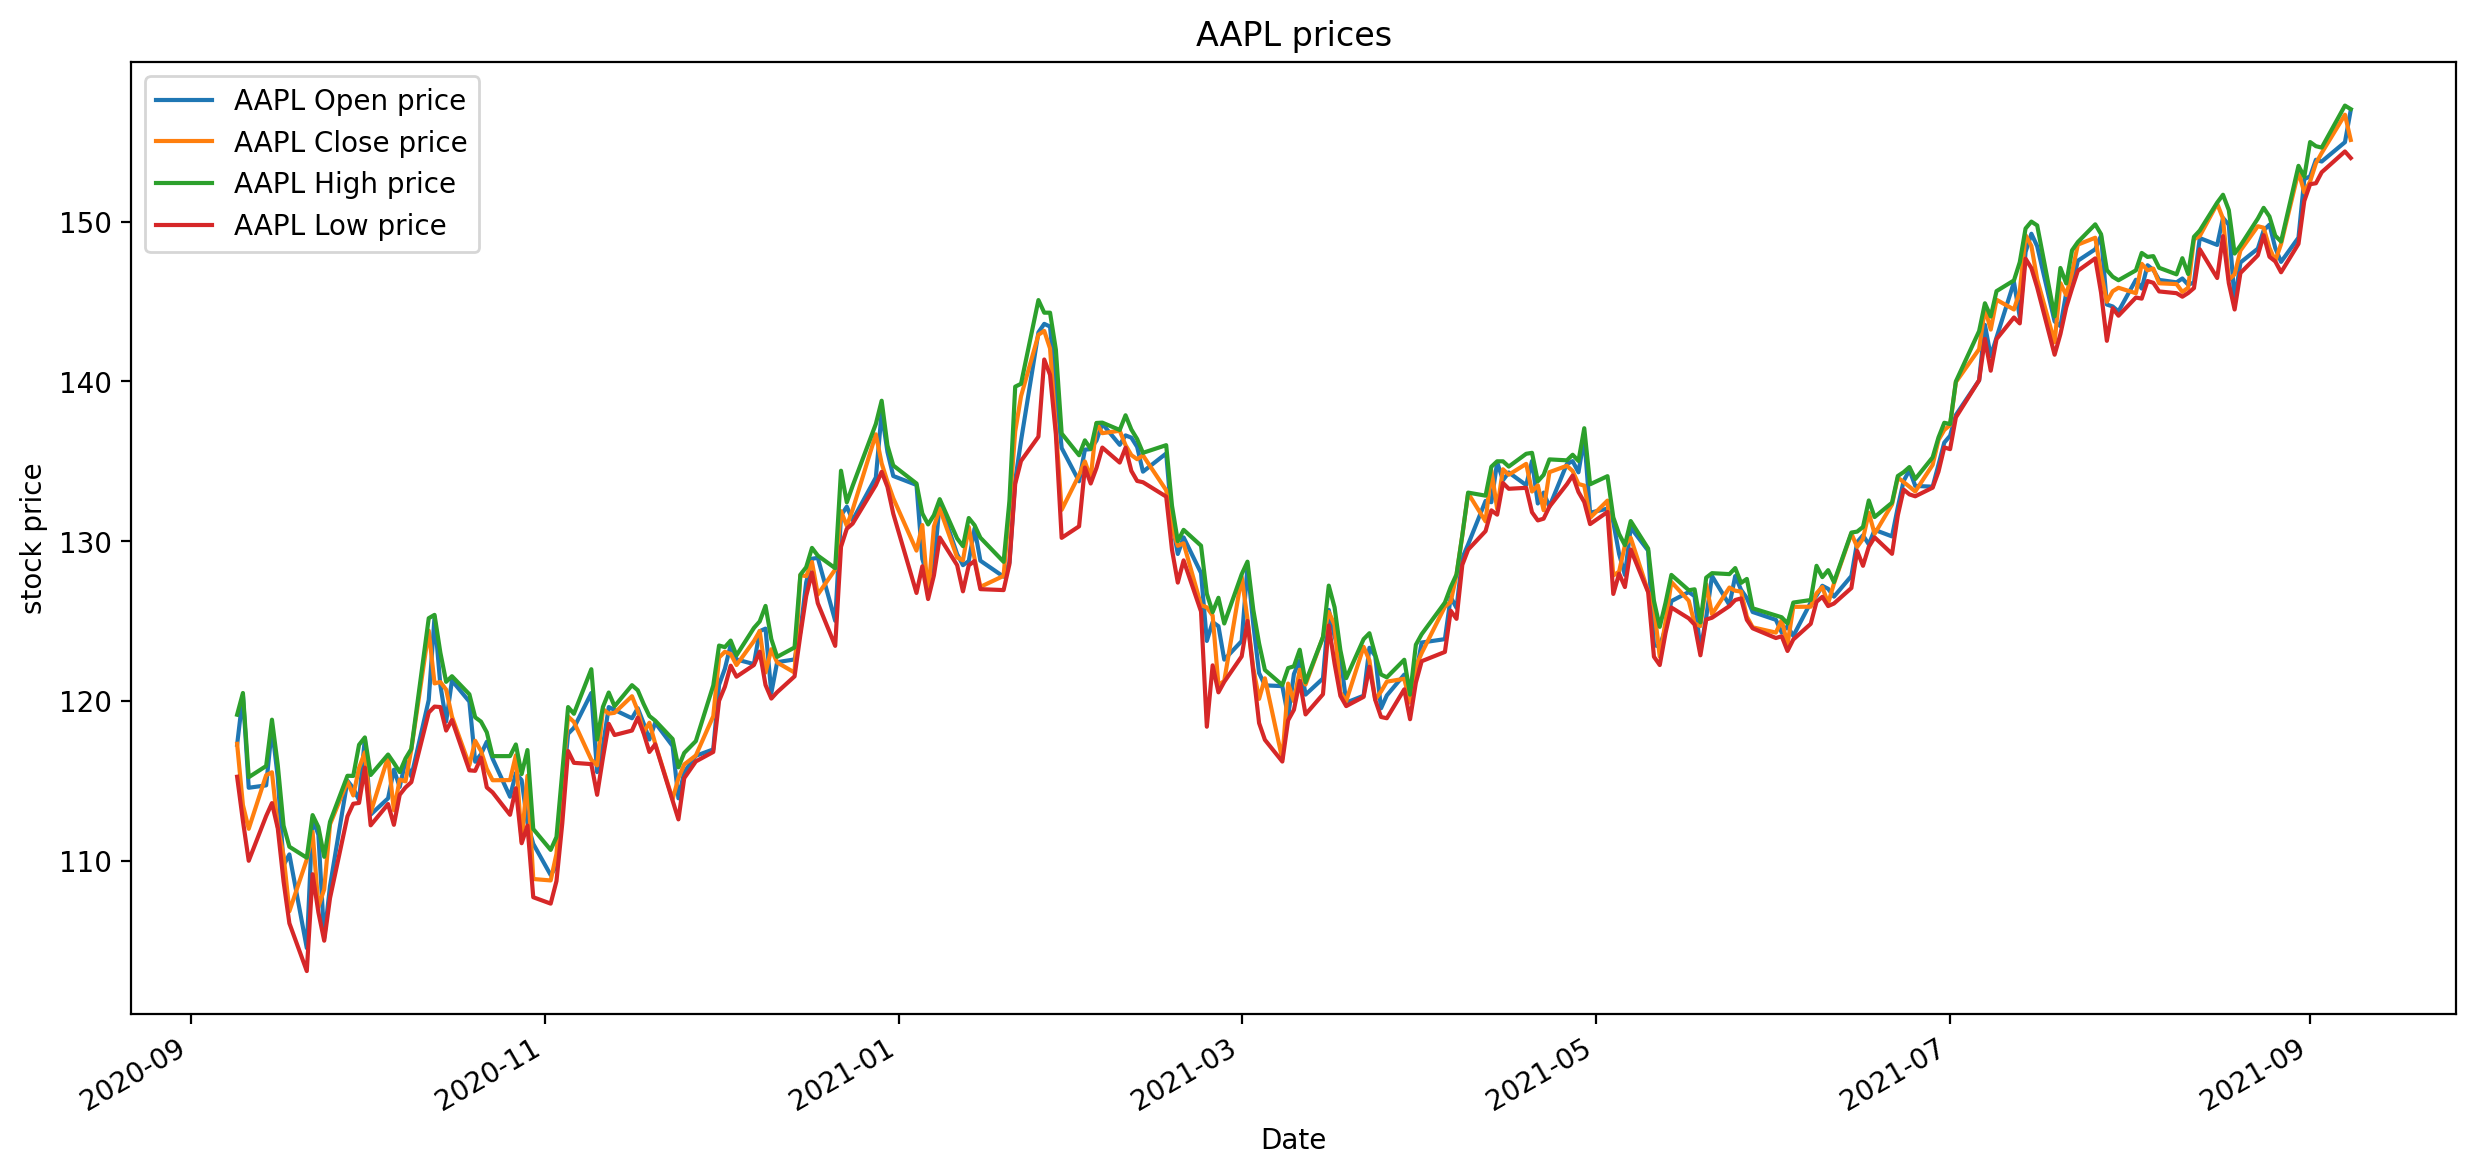

In [42]:
plt.figure(figsize=(15,7), dpi=200)

df['Open'].plot(label=f'{stock} Open price')
df['Close'].plot(label=f'{stock} Close price')
df['High'].plot(label=f'{stock} High price')
df['Low'].plot(label=f'{stock} Low price')

plt.title(f'{stock} prices')
plt.legend()

plt.ylabel('stock price')
plt.show()

### Volume traded visualization

Text(0, 0.5, 'Volume traded')

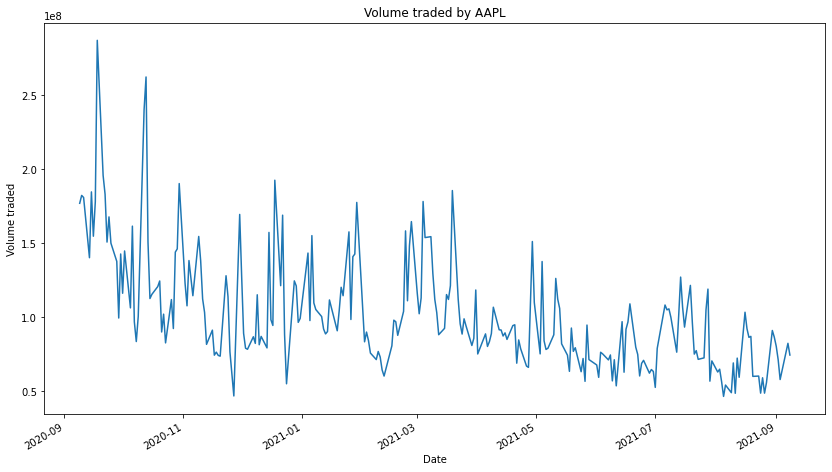

In [43]:
df['Volume'].plot(figsize=(14,8))

plt.title(f'Volume traded by {stock}')
plt.ylabel('Volume traded')

### Add 'Total Traded' column = Open * Volume

In [44]:
df['Total Traded'] = df['Open'] * df['Volume']
df.head()

,Open,High,Low,Close,Adj Close,Volume,#,Total Traded
Date,,,,,,,,
2020-09-09,117.260002,119.139999,115.260002,117.320000,116.570236,176940500,0,2.074804e+10
2020-09-10,120.360001,120.500000,112.500000,113.489998,112.764717,182274400,1,2.193855e+10
2020-09-11,114.570000,115.230003,110.000000,112.000000,111.284241,180860300,2,2.072116e+10
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100,3,1.607802e+10
2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000,4,2.184869e+10


### Moving average: Good for determining Trends

<AxesSubplot:xlabel='Date'>

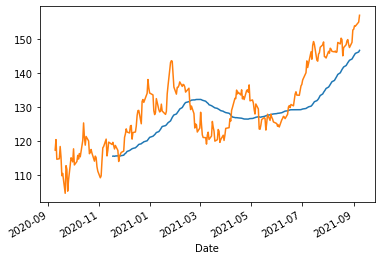

In [45]:
df['MA50'] = df['Open'].rolling(50).mean()

df['MA50'].plot()
df['Open'].plot()
# df.head(50)

### Candlestick chart

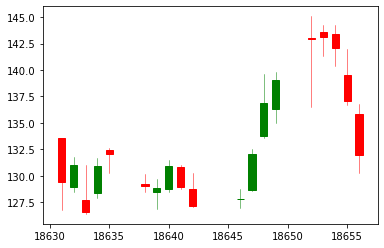

In [46]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

df_reset = df.loc['2021-01' : '2021-01'].reset_index()

df_reset['date_ax'] = df_reset['Date'].apply(lambda date: date2num(date))

df_values = [tuple(vals) for vals in df_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

# mondays = WeekdayLocator(MONDAY)
# all_days = DayLocator()
# WeekFormatter = DateFormatter('%b %d')
# dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
candlestick_ohlc(ax, df_values, width=0.6, colorup='green')
plt.show()

### Daily percentage return

In [47]:
df['returns'] = (df['Close'] / df['Close'].shift(1)) - 1
df.head()

,Open,High,Low,Close,Adj Close,Volume,#,Total Traded,MA50,returns
Date,,,,,,,,,,
2020-09-09,117.260002,119.139999,115.260002,117.320000,116.570236,176940500,0,2.074804e+10,NaN,NaN
2020-09-10,120.360001,120.500000,112.500000,113.489998,112.764717,182274400,1,2.193855e+10,NaN,-0.032646
2020-09-11,114.570000,115.230003,110.000000,112.000000,111.284241,180860300,2,2.072116e+10,NaN,-0.013129
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100,3,1.607802e+10,NaN,0.030000
2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000,4,2.184869e+10,NaN,0.001560


In [48]:
df['Avg return'] = df['returns'].expanding().mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,#,Total Traded,MA50,returns,Avg return
Date,,,,,,,,,,,
2020-09-09,117.260002,119.139999,115.260002,117.320000,116.570236,176940500,0,2.074804e+10,NaN,NaN,NaN
2020-09-10,120.360001,120.500000,112.500000,113.489998,112.764717,182274400,1,2.193855e+10,NaN,-0.032646,-0.032646
2020-09-11,114.570000,115.230003,110.000000,112.000000,111.284241,180860300,2,2.072116e+10,NaN,-0.013129,-0.022887
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100,3,1.607802e+10,NaN,0.030000,-0.005258
2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000,4,2.184869e+10,NaN,0.001560,-0.003554


In [49]:
df['Cumulative return'] = df['returns'].cumsum()
df.head()

,Open,High,Low,Close,Adj Close,Volume,#,Total Traded,MA50,returns,Avg return,Cumulative return
Date,,,,,,,,,,,,
2020-09-09,117.260002,119.139999,115.260002,117.320000,116.570236,176940500,0,2.074804e+10,NaN,NaN,NaN,NaN
2020-09-10,120.360001,120.500000,112.500000,113.489998,112.764717,182274400,1,2.193855e+10,NaN,-0.032646,-0.032646,-0.032646
2020-09-11,114.570000,115.230003,110.000000,112.000000,111.284241,180860300,2,2.072116e+10,NaN,-0.013129,-0.022887,-0.045775
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100,3,1.607802e+10,NaN,0.030000,-0.005258,-0.015775
2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000,4,2.184869e+10,NaN,0.001560,-0.003554,-0.014214


In [50]:
df['Annualized return'] = (1 + df['Cumulative return'])**(365/(df['#'] + 1)) - 1
df

,Open,High,Low,Close,Adj Close,Volume,#,Total Traded,MA50,returns,Avg return,Cumulative return,Annualized return
Date,,,,,,,,,,,,,
2020-09-09,117.260002,119.139999,115.260002,117.320000,116.570236,176940500,0,2.074804e+10,NaN,NaN,NaN,NaN,NaN
2020-09-10,120.360001,120.500000,112.500000,113.489998,112.764717,182274400,1,2.193855e+10,NaN,-0.032646,-0.032646,-0.032646,-0.997659
2020-09-11,114.570000,115.230003,110.000000,112.000000,111.284241,180860300,2,2.072116e+10,NaN,-0.013129,-0.022887,-0.045775,-0.996657
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100,3,1.607802e+10,NaN,0.030000,-0.005258,-0.015775,-0.765643
2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000,4,2.184869e+10,NaN,0.001560,-0.003554,-0.014214,-0.648340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,247,1.227434e+10,144.951801,0.004479,0.001232,0.304232,0.478347
2021-09-02,153.869995,154.720001,152.399994,153.649994,153.649994,71115500,248,1.094254e+10,145.353801,0.007475,0.001257,0.311707,0.488445
2021-09-03,153.759995,154.630005,153.089996,154.300003,154.300003,57808700,249,8.888665e+09,145.740001,0.004230,0.001269,0.315938,0.493082


In [51]:
print(df['returns'].mean())
print(df['returns'].sum())

0.0012802522162068696
0.3213433062679243


In [52]:
df['volatility'] = df['Close'].rolling(30).std()
all_volatility = df['volatility'].dropna().values
mean_volatility_30 = all_volatility.mean()

In [53]:
u = np.exp(mean_volatility_30 * np.sqrt(1/12))
d = 1 / u
u

3.511201705118282

In [54]:
mean_volatility_30

4.350767331510224

In [55]:
d

0.28480277807518123

<AxesSubplot:xlabel='Date'>

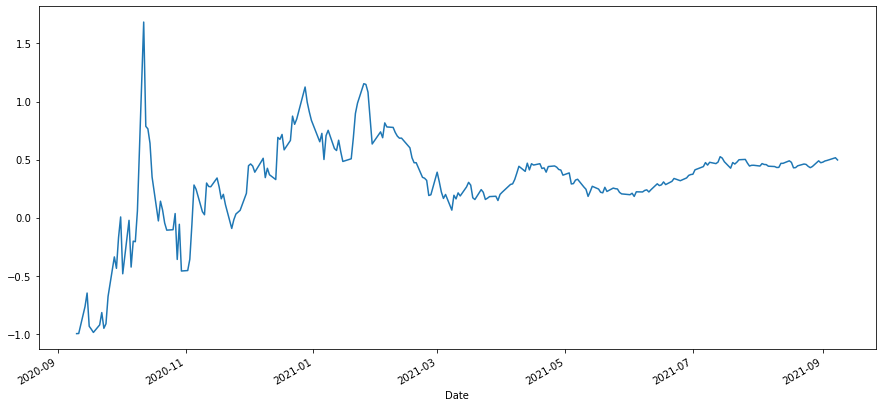

In [56]:
df['Annualized return'].plot(figsize=(15,7))